In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
# from datetime import datetime

In [2]:
# Create plate class for keeping track of each plate
class Plate:
    def __init__(self, name, dt):
        self.name = name
        self.dt = dt
    def timepoint(self, tp):
        return tp-self.dt

# Create a timepoint class that keeps track of which plate was taken
class Timepoint:
    def __init__(self, name, dt, plate):
        self.name = name
        self.dt = dt
        self.plate = plate
    def recorded_timepoint(self):
        tp = self.plate.timepoint(self.dt)
        return tp.days*24 + tp.seconds/3600

In [3]:
def load_files():
    plate_path = "plates.csv"
    timepoint_path = "timepoints.csv"
    plate_df = pd.read_csv(plate_path)
    timepoint_df = pd.read_csv(timepoint_path)
    
    # Redefine the timepoint to a datetime object
    plate_df["Timepoint"] = pd.to_datetime(plate_df["Timepoint"])
    timepoint_df["Timepoint"] = pd.to_datetime(timepoint_df["Timepoint"])
    
    return (plate_df, timepoint_df)

In [4]:
def calculate_timepoints(plate_df, timepoint_df):
    plate_ar = np.empty(len(plate_df), dtype=Plate)
    for pix in range(len(plate_df)):
        plate = plate_df.iloc[pix]
        plate_ar[pix] = Plate(plate["plate_name"], plate["Timepoint"])
        
    timepoint_ar = np.empty(len(timepoint_df), dtype=Timepoint)
    for tix in range(len(timepoint_df)):
        tp = timepoint_df.iloc[tix]
        # Find the idx of the plate from the plate_id
        plate_name = plate_df[plate_df["plate_id"] == tp["plate_id"]]["plate_name"].values[0]
        for plate in plate_ar:
            if plate.name == plate_name:
                timepoint_ar[tix] = Timepoint(tp["Timepoint_name"], tp["Timepoint"], plate)
                break
                
    recorded_timepoints_ar = np.zeros_like(timepoint_ar, dtype=np.double)
    for rix in range(len(recorded_timepoints_ar)):
        recorded_timepoints_ar[rix] = timepoint_ar[rix].recorded_timepoint()
            
    records_df = pd.DataFrame({"plate_id": timepoint_df["plate_id"],
                               "time": recorded_timepoints_ar,
                               "comment": timepoint_df["Comment"]})   
    return records_df

In [26]:
plate_df, timepoint_df = load_files()
plate_df = plate_df.dropna()
timepoint_df = timepoint_df.dropna()
records_df = calculate_timepoints(plate_df, timepoint_df)
records_df.index = np.arange(1,42)
records_df.index.name = "Tp_id"
records_df = records_df.sort_values(by="time")


display(records_df)

,plate_id,time,comment
Tp_id,,,
1,2,1.166667,Random guess
2,2,2.166667,Random guess
3,2,3.166667,Random guess
4,2,4.166667,Random guess
5,2,5.166667,Random guess
6,2,6.500000,Random guess
7,2,7.500000,Random guess
8,2,9.500000,Closeup
9,2,10.250000,Closeup


In [20]:
# Define different color and shapes for checking all the calculated times for each timepoint
colors = "rgbcmyk"
filled_markers = "ov<sp*dP"
marker_type_all = []
for color in colors:
    for marker in filled_markers:
        marker_type_all.append(color + marker)
        
marker_type_all = np.array(marker_type_all)
np.random.shuffle(marker_type_all)

<IPython.core.display.Javascript object>


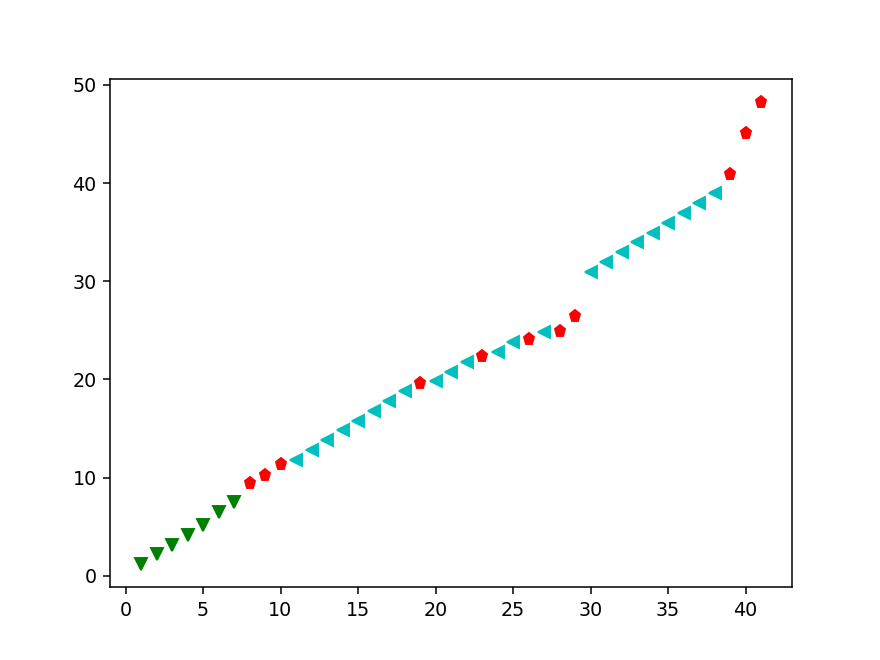

In [21]:
unique_comments = timepoint_df["Comment"].unique()
fig, ax = plt.subplots()

for cix in range(len(unique_comments)):
    tpar = records_df[records_df["comment"] == unique_comments[cix]]
    ax.plot(tpar["time"], marker_type_all[cix])




In [9]:
records_df.index = records_df.index+1

In [11]:
records_df.index.name = "TimePoint"

In [13]:
records_df

,plate_id,time,comment
TimePoint,,,
1,2,1.166667,Random guess
2,2,2.166667,Random guess
3,2,3.166667,Random guess
4,2,4.166667,Random guess
5,2,5.166667,Random guess
6,2,6.500000,Random guess
7,2,7.500000,Random guess
8,2,9.500000,Closeup
9,2,10.250000,Closeup
